# Projet DATA MINING

## Introduction

L'abondant des postes est un problème pour les entreprises qui peut s'avérer être très couteux. C'est pourquoi il est stratégique aux entreprises de comprendre pourquoi et quand les employés sont susceptibles de quitter leur poste. Notre but à partir de ce TP est de pouvoir prévoir pourquoi et quand les employés vont quitter.

## Les données:

Nous avons à disposition pour cette fin les données sur tout les employés qui ont joint l'entreprise entre le *24/01/2011* et *13/12/2015*. Nous savons aussi pour chaque employé s'il est toujours dans l'entreprise à la date du *13/12/2015* (ou s'il a démissioné). Nous avons aussi des informations générales sur l'employée, telles que le salaire moyen pendant son mandat, son département et ses années d'expérience.

Notre tableau de donnée à la structure suivante:

employee | company | dept | seniority | salary | join_date | quit_date | churn | duration_days |
:------- | :------- | :------- | :------- | :------- | :------- | :------- | :------- | :------- |
id de l'employé unique par employé par entreprise | id de l'entreprise | département des employés |  nombre d'années d'expérience de travail au moment de l'embauche | salaire annuel moyen du salarié pendant son mandat au sein de l'entreprise|  lorsque l'employé a rejoint l'entreprise, cela ne peut se faire qu'entre le 24/01/2011 et le 13/12/2015 | date à laquelle l'employé a quitté son emploi (si il est toujours employé au 13/12/2015, ce champ est NA) | yes si l'employé a quitté son emploi, No au cas où il est toujours dans l’entreprise | durée en jours entre join_date et quit_date 

# A-	Prétraitement des données 

Avant de procéder à l'analyse de ces données, il faut d'abord procéder à un prétraitement, en :
1. 	Uniformisant les titres de colonnes en des noms minuscules 
2.	Vérifiant les types de données des colonnes
3.	Transformant join_date et quit_date en des dates
4.	Eliminant les valeurs manquantes pour l’attribue « salary »
5.	Changeant le type de l’attribue « salary » à float


Tout d'abord, importons nos  données sur les employés d'une entreprise.

*Nous réaliserons l'analyse et le traitement de ces données avec la bibliothèque pandas sur Python*

In [17]:
#On importe la bibliothèque pandas
import pandas as pd 
# On importe aussi a bibliothèque matplotlib.pyplot qui peut être la visualisation des données.
import matplotlib.pyplot as plt 
df = pd.read_csv('C:/Users/jebba/Desktop/employee_retention_data.csv',sep=',')#on peut ajouter le séparateur
#lire les  premières lignes
df.head() 

,employee_id,company_id,dept,seniority,SALARY,join_date,quit_date,churn,duration_jours
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,yes,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,yes,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,No,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,yes,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,yes,1040.0


## 1. Mettre le nom des colonnes en minuscule 

Comme évoqué précedemment, la première étape est de mettre le nom de nos colonnes en misuscule.
pour cela, nous allons utiliser la commande `df.rename` de pandas.

In [18]:
#On Stocke le nom de nos colonnes
columns_values = df.columns.values
#On crée un dictionnaire ou la clé est le nom de la colonne et sa valeur son nouveau nom (en minuscule) 
dico_rename_column = dict()
list_rename_columns =  [ {column: column.lower()} for column in columns_values ] 
for values in list_rename_columns:
    dico_rename_column.update(values)
#On renomme les colonnes de notre tableau avec la methode rename 
df.rename(columns=dico_rename_column,inplace=True)
#Nos nouvelles colonnes sont en minuscules
df.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'churn', 'duration_jours'],
      dtype='object')

##	Vérifier les types de données des colonnes

Vérifions le type de nos données pour vérifier que leurs types soientt bien choisis pour une éventuelle analyse. 

Pour celà nous utilisons la méthode `dtype` de l'objet *DataFrame*

In [19]:
df.dtypes

employee_id       float64
company_id          int64
dept               object
seniority           int64
salary            float64
join_date          object
quit_date          object
churn              object
duration_jours    float64
dtype: object

Nous remarquons que `join_date` et `quit_date` sont de type Objet. Il serait profitable que leurs types soit de type **DateTime**.

##	Changer le type des colonnes *join_date* et *quit_date* en type de date

Pour changer le type des colonnes, on peut utiliser la méthode `to_datetime` en spécifiant le format des dates comme suit:

In [20]:
# Conversion du type des colonnes
df["join_date"]=pd.to_datetime(df["join_date"],format='%Y-%m-%d')
df["quit_date"]=pd.to_datetime(df["join_date"],format='%Y-%m-%d')
#Affichage du contenu de join_date et quit_date
df[["join_date","quit_date"]].head()

,join_date,quit_date
0,2014-03-24,2014-03-24
1,2013-04-29,2013-04-29
2,2014-10-13,2014-10-13
3,2012-05-14,2012-05-14
4,2011-10-17,2011-10-17


Ensuite on procède à la vérification du changement:

In [21]:
df.dtypes

employee_id              float64
company_id                 int64
dept                      object
seniority                  int64
salary                   float64
join_date         datetime64[ns]
quit_date         datetime64[ns]
churn                     object
duration_jours           float64
dtype: object

Cela fait, on va maintenant retirer les salariés dont la valeur des salaire est manquante

## Eliminer les valeurs manquantes pour l’attribut salary 

Tout d'abord, on vérifie bien qu'il existe des valeurs manquantes. On peut utiliser la méthode `isna` de numpy et ensuite la méthode `unique` pour énumérer les valeurs distinctes (éventuellement True et False):

In [22]:
df['salary'].isna().unique()

array([False,  True])

Alors la présence du *Boolean* `True` montre qu'il existe des valeurs manquantes.

Procédons maintenant à la suppression de ces valeurs manquantes, pour cela on utilise ma méthode `dropna` comme suit:

In [23]:
df.dropna(subset=['salary'],axis=0, inplace=True)

On vérifie qu'il n'y a plus de valeurs manquantes:

In [24]:
df['salary'].isna().unique()

array([False])

Etant donner que dans nos données, nous n'avons plus de valeurs manquantes pour la colonne **salary**, nous allons plutot la convertir en type **float**

##	Changement du type de l’attribut salary en float

Comme effectuer précedemment, nous allons utiliser la méthode `astype`:

In [25]:
df['salary'] = df['salary'].astype(float)
df['salary'] .dtype

dtype('float64')

Ayant dans la partie précédente effectué le prétraitement des données en vérifiant leur format et leur contenue, nous allons dans la partie suivante décrire leur contenue. 

# B- Description du jeu de données

Tout d'abord, comptons le nombre de lignes et de colonne de notre tableau de donnée en utilisant la méthode `shape`:

In [26]:
df.shape

(24702, 9)

Ensuite, nous allons identifier des principales caractéristiques du jeu de données à partir de la méthode `describe`:

In [27]:
df.describe()

,employee_id,company_id,seniority,salary,duration_jours
count,24702.000000,24702.000000,24702.000000,24702.000000,13510.000000
mean,501604.403530,3.426969,14.127803,138183.345478,613.486825
std,288909.026101,2.700011,8.089520,76058.184573,328.622613
min,36.000000,1.000000,1.000000,17000.000000,102.000000
25%,250133.750000,1.000000,7.000000,79000.000000,361.000000
50%,500793.000000,2.000000,14.000000,123000.000000,417.000000
75%,753137.250000,5.000000,21.000000,187000.000000,781.000000
max,999969.000000,12.000000,99.000000,408000.000000,1726.000000


Nous remarquons que pour la caractéristique:
* **count:** Elle est pratiquement égale pour tout les attributs sauf pour *duration_jours étant donnée que quelques valeurs sont manquantes.
* **mean:** Le nombre moyenne d'année d'expérience est de 14, le salaire moyen annuel pendant le mandat d'un salarié de l'etreprise est de 138183.345478  et la durée moyenne entre join_date et quit_date de 613.
* **std:** Nous remarquons un écart-type sur le nombre d'année d'expérience de 8 ans et sur les salaires de 76058.184573.
* **min:** le nombre minimale d'année d'expérience est d'un ans, le salaire annuelle minimale 17000  et la durée minimale entre join_date et quit_date est de 102.
* **max:** le nombre maximale d'année d'expérience est de 99, le salaire annuelle maximale est de  408000  et la durée maximale entre join_date et quit_date est de 1726.
* **25% - 50% - 75%**: il s'agit des quartiles caractérisant la distributions de nos données (on peut les visualiser plus facilement avec une Boite à moustache *Box-plot*

On peut visualiser la distribution des quartiles de nos données plus facilement avec une Boxplot,  on utilise la méthode `boxplot` de pandas:

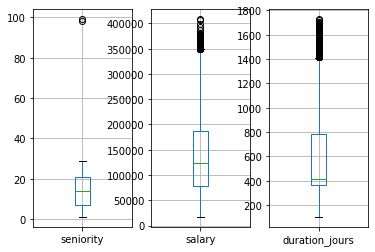

In [28]:
plt.subplot(1,3,1)
df[ ['seniority']].boxplot()

plt.subplot(1,3,2)
df[['salary']].boxplot()

plt.subplot(1,3,3)
df[['duration_jours']].boxplot()

##  Estimation quotidient des effectifs

Dans cette partie, on fait l'hypothèqe que les effectifs commencent à zéro le 23/01/2011. Donc on commence à compter les effectif à cette date.

Les gens recrutés dans l'entreprise à partir de cette date sont: *(on affiche les premières lignes)*

In [29]:
df1=df.loc[ (df['join_date'] >= "2011-01-23") & (df['join_date'] <= "2015-12-13") ]
#On affiche les premières lignes
df1.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,duration_jours
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2014-03-24,yes,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2013-04-29,yes,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,2014-10-13,No,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2012-05-14,yes,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2011-10-17,yes,1040.0


Evidemment parmis ces gens, on a ceux qui sont restés dans l'entreprise après la date du 13/12/2015 et ceux qui sont partis avant. Ce qui nous interesse nous, c'est l'effectif quotident entre ces deux dates

Nous allons créer un tableau de la forme (company_id, join_date, count_employee) contenant pour chaque date l'effectif des employés dans l'entreprise

In [30]:
import numpy as np
df3=df1[['join_date','company_id']]#création d'un tableau qui contient les 3 colonnes du tableau précédant
df3.loc[:,'new_hire'] =np.nan#ajout de la colonne count_employee
df3.head()

C:\Users\jebba\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jebba\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,join_date,company_id,new_hire
0,2014-03-24,7,NaN
1,2013-04-29,7,NaN
2,2014-10-13,4,NaN
3,2012-05-14,7,NaN
4,2011-10-17,2,NaN


Cela fait, il suffit de raisonné sur `join_date`et `compani_id`.

Avec l'algorithme suivant

````
Pour  ligne dans df3 faire:
    ligne_date = ligne[join_date]
    ligne_id = ligne[company_id]
    new_hire = Nombre d'employé de l'entrepride ligne_id employés avant la date ligne_date
````

Sur python en utilisant pandas, on a ce code:

In [31]:
for idx_ligne in range(df3.shape[0]):#parcours des lignes du dataframe
    count_employee = df3[( df3['join_date'] <= df3.loc[idx_ligne,'join_date'] ) & ( df3['company_id'] == df3.loc[idx_ligne,'company_id'] )].shape[0]
    #df3['join_date'] <= df3.loc[idx_ligne,'join_date'] : on prend tous les enregistremets dont join_date est antérieur à celle de la ligne courante
    #df3['company_id'] == df3.loc[idx_ligne,'company_id'] et qui travaillent dans la même entreprise 
    df3.loc[idx_ligne,'new_hire'] = count_employee #on pose la valeur calculée dans la colonne crée 
#On affiche les premières lignes
df3.head()

,join_date,company_id,new_hire
0,2014-03-24,7,828.0
1,2013-04-29,7,592.0
2,2014-10-13,4,1596.0
3,2012-05-14,7,331.0
4,2011-10-17,2,615.0


### Remarque:
On aurait pu générer un tableau ou il y a toutes les dates jour par jour au lieu de générer un tableau basé sur les dates existantes. Ce choix a été faits pour des questions d'optimisation de temps de calcul et simplicité d'implémentation

On pourrait obsever nos résultats à travers les courbes:

C:\Users\jebba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\jebba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


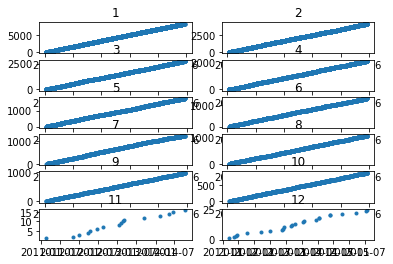

In [32]:
for i in range(1,12+1):
        plt.subplot(6,2,i)
        plt.title( str(i))
        effectif = df3.sort_values(by='join_date')[ df3['company_id'] == i]['new_hire'].values
        dates = df3.sort_values(by='join_date')[ df3['company_id'] == i]['join_date'].values
        plt.plot(dates,effectif,'.')

## Nombre de nouveaux employé quotidient dans chaque entreprise

Dans cette partie, nous allons calculer le nombre de nouveaux employés chaque jour pour chaque entreprise. 

Notre tableau aura pour colonne: (company_id, join_date, count_new_hire).

Procédons à sa création:

In [35]:
#création d'un tableau qui contient les 3 colonnes du tableau précédant
df4=df1[['join_date','company_id']]
#ajout de la colonne count_new_hire
df4.loc[:,'count_new_hire'] = np.nan

# je reprend ici l'indexation des lignes du tableau (ca ne change rien à son contenue)
df4=df4.reset_index() 

#Affichons les premières lignes
df4.head()

,index,join_date,company_id,count_new_hire
0,0,2014-03-24,7,NaN
1,1,2013-04-29,7,NaN
2,2,2014-10-13,4,NaN
3,3,2012-05-14,7,NaN
4,4,2011-10-17,2,NaN


Cela fait, il suffit de raisonné sur `join_date`et `compani_id`.

Avec l'algorithme suivant

````
Pour  ligne dans df4 faire:
    ligne_date = ligne[join_date]
    ligne_id = ligne[company_id]
    count_new_hire = Nombre d'employé de l'entrepride ligne_id employés avant à la date ligne_date
````

Sur python avec la bibliothèque pandas, on obtient le résutat suivant:

In [36]:
for idx_ligne in range(df4.shape[0]):#parcours des lignes du dataframe
    count_new_hire = df4[( df4['join_date'] == df4.loc[idx_ligne,'join_date'] ) & ( df4['company_id'] == df4.loc[idx_ligne,'company_id'] )].shape[0]
    #df4['join_date'] == df4.loc[idx_ligne,'join_date'] : on prend tous les enregistremets des gents qui se sont recrutés la même journée
    #df4['company_id'] == df4.loc[idx_ligne,'company_id'] et qui travaillent dans la même entreprise 
    df4.loc[idx_ligne,'count_new_hire'] = count_new_hire #on pose la valeur calculée dans la colonne crée 
#On affiche les premières lignes
df4.head()

,index,join_date,company_id,count_new_hire
0,0,2014-03-24,7,9.0
1,1,2013-04-29,7,5.0
2,2,2014-10-13,4,14.0
3,3,2012-05-14,7,5.0
4,4,2011-10-17,2,15.0


### Remarque:
On aurait pu générer un tableau ou il y a toutes les dates jour par jour au lieu de générer un tableau basé sur les dates existantes. Ce choix a été faits pour des questions d'optimisation de temps de calcul et simplicité d'implémentation

On pourrait observer nos résultats à travers les courbes

C:\Users\jebba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\jebba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


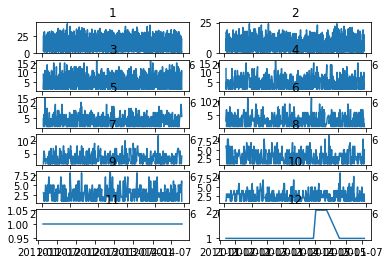

In [37]:
for i in range(1,12+1):
        plt.subplot(6,2,i)
        plt.title( str(i))
        effectif = df4.sort_values(by='join_date')[ df4['company_id'] == i]['count_new_hire'].values
        dates = df4.sort_values(by='join_date')[ df4['company_id'] == i]['join_date'].values
        plt.plot(dates,effectif)

Visuellement, on remarque bien que l'entreprise 11 et 12 ont moins de recrutements. Ce qui difficilement observable sur un tableau. L'entreprise numéro 12 apparemment recrute plus sur une période bien précise

## Le nombre d'employé ayant quitté l'entreprise chaque jour

En procédant de la même manière que le cas précédent. on obtient les résultats:

In [39]:
df5=df1[['quit_date','company_id']]#création d'un tableau qui contient les 3 colonnes du tableau précédant
df5.loc[:,'count_churn'] =np.nan#ajout de la colonne coun_churn
df5=df5.reset_index()

In [ ]:
 for idx_ligne in range(df5.shape[0]):#parcours des lignes du dataframe
    count_churn = df5[( df1['churn'] == 'No' ) & ( df5['quit_date'] == df5.loc[idx_ligne,'quit_date'] ) & ( df5['company_id'] == df5.loc[idx_ligne,'company_id'] )].shape[0]
    #df5['company_id'] == df3.loc[idx_ligne,'company_id'] et qui travaillent dans la même entreprise 
    df5.loc[idx_ligne,'count_churn'] = count_churn #on pose la valeur calculée dans la colonne crée 
df5.head()

### Remarque:
On aurait pu générer un tableau ou il y a toutes les dates jour par jour au lieu de générer un tableau basé sur les dates existantes. Ce choix a été faits pour des questions d'optimisation de temps de calcul et simplicité d'implémentation

In [ ]:
for i in range(1,12+1):
        plt.subplot(6,2,i)
        plt.title( str(i))
        effectif = df5.sort_values(by='quit_date')[ df5['company_id'] == i]['count_churn'].values
        dates = df5.sort_values(by='quit_date')[ df5['company_id'] == i]['quit_date'].values
        plt.plot(dates,effectif)

## Distribution de Churn Salary
Pour observer la distributions des salaires et de churn nous allons utiliser des boxplots toutes entreprises confondus:

In [ ]:
df1.plot.box(x='churn',y='salary')

## Classification

### Classification binaire supervisé selon l'attribut Churn avec  un arbre de décision 

Dans cette partie, nous allons entamer la création  d'un arbre de décision pour classifier les contributeurs selon **churn** (Yes ou No) avec comme attributs d’entrés **seniority**, **salary**.

Pour cela, nous allons utiliser la bibliothèque `sklearn` de python.
Commençons par les importer:

In [ ]:
from pandas.plotting import scatter_matrix # pandas.tools.plotting deprecated
from sklearn import model_selection ## randomly split daa into training and test sets

#### Création du training set et test set
On crée le training set et le test set à partir des données de nos tableaux. On choisis d'utiliser 80% de nos données pour l'entrainement et 20% pour le test :

In [ ]:
columns_training =['seniority', 'salary']
columns_test=['churn']

X = df1[columns_training].values
Y= df1[columns_test].values

seed = 7
#training, test datset 
df_values = df1.values # puts all of the rows into array format;
# les attributs d’entrés sont seniority, salary
# notre attribut de classification est churn
validation_size = 0.20 # 80% training data, 20% test data
# randomly split daa into training and test sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size= validation_size, random_state=seed) 

Le couple de variable: 
* **(X_train,Y_train)**: servira à l'apprentissage supervisé de notre modèle d'apprentissage.
* **(X_validation,Y_validation)**: servira à évaluer les performances de notre modèle d'apprentissage.

Créons alors notre modèle à entrainer:

Visualisons d'abord nos données à classifier.

Nous visualiserons seulement 1000 points pour avoir une idée

In [ ]:
for i in range(1000):
    if Y[i] == 'yes':
        plt.plot(X[i][0],X[i][1],'+', color='b')
    if Y[i] == 'No':
        plt.plot(X[i][0],X[i][1],'*', color='r')
#On labelise nos axes
plt.xlabel('seniority')
plt.ylabel('salary')

Il semble visuellement  compliquer de trouver une règle  pour classifier ces données.

Cela dit, nous allons commencer la création de notre arbre de décision:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree classifer object
clf=DecisionTreeClassifier()

Notre modèle créer, il va falloir l'entrainer à partir des données d'entrainement: **(X_train,Y_train)**

In [ ]:
# Entrainement supervisé de notre modèle
model=clf.fit(X_train, Y_train)
#affichage du contenue de notre modèle
model

Notre modèle créé et entrainé, nous devons maintenant évaluer ses performances à partir des données de tests: **(X_validation,Y_validation)**.

Pour cela nous allons utiliser la matrice de confusion de notre modèle. Elle représente:

Vrai Positif | Faux Positif
:---: | :---: 
Faux Positif | Faux Négatif

Tout d'abord, effectuons une prediction des résultats de nos données de tests:

In [ ]:
y_pred = model.predict(X_validation)

Celà fait, comparons avec les données de références: **Y_validation** à partir de la matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Evaluating predictions
#Building confusion matrix:
cm = confusion_matrix(Y_validation, y_pred)
cm

En terme de poucentage:

In [ ]:
cm / cm.sum() * 100

Nous obtenons en terme de pourcentage (en arrondi) les résultats:
    
22.75% | 21.92%
:---: | :---: 
27.02% | 28.31%

Notre modèle n'est pas parfait, mais peut être perfectible en ajustant correctement ses paramètres.


Nous pouvons aussi avoir un rapport de classification avec ma conftion `classification_report` de sklearn.metrics.
Dans ce rapport nous aurons le score de classification pour différentes métrics:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, y_pred))

Pour visualiser notre arbre de décision, utilisons la méthode plot_tree qui prend en paramètre notre modèle.

In [ ]:
import sklearn
sklearn.tree.plot_tree(model) 

### Classification binaire supervisée de churn en à partir d'un modèle KNN

Dans cette partie, de la même manière que la partie précédente, nous alllons entrainer un modèle **KNN** pour une classification binaire de l'attribut *Churn* à partir des données *Salary* et *Seniority*

Commençons par créer et entrainer un modèle **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)

A partir des même données d'entrainements et tests de la partie précédente, nous allons entrainer notre modèle.

In [ ]:
clf_knn.fit(X_train, Y_train)

Celà fait, on fait maintenant une prediction sur les données de test afind 'évaluer notre modèle:

In [ ]:
y_pred_knn = clf_knns.predict(X_validation)

Celà fait, comparons avec les données de références: **Y_validation** à partir de la matrice de confusion

In [ ]:
cm_knn = confusion_matrix(Y_validation, y_pred_knn)
cm_knn

Nous obtenons en terme de pourcentage (en arrondi) les résultats:
    
XX% | XX%
:---: | :---: 
XX% | XX%

Notre modèle n'est pas parfait, mais peut être perfectible en ajustant correctement ses paramètres.


Comme fait dans la partie précédente, affichons le score de classification pour différentes métriques

In [ ]:
print(classification_report(Y_validation, y_pred_knn)) 